In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain  # For Louvain method
from sklearn.cluster import SpectralClustering
from matplotlib.colors import ListedColormap

In [2]:
# Step 1: Load the Graph from the GML File
gml_file = 'youtube_cyberbullying_graph.gml'
G = nx.read_gml(gml_file)

# Basic Graph Information
print("Graph Info:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Graph Info:
Number of nodes: 3518
Number of edges: 343446


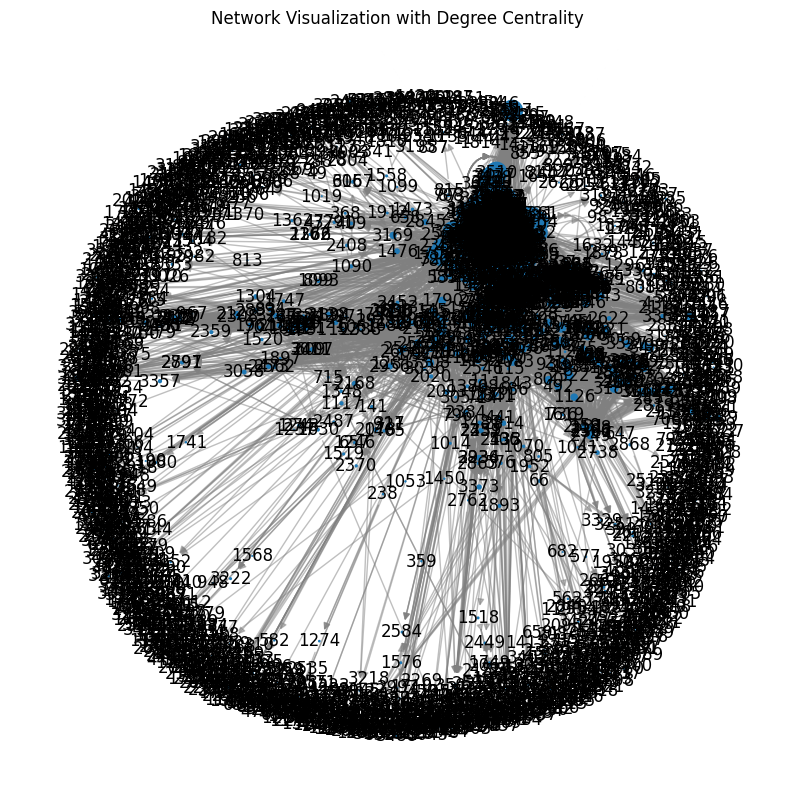

In [3]:
# Step 2: Degree Centrality and Visualization
degree_centrality = nx.degree_centrality(G)
pos = nx.spring_layout(G)  # Layout for graph visualization

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=[degree_centrality[node] * 1000 for node in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.title("Network Visualization with Degree Centrality")
plt.savefig("Network_Degree_Centrality.png", dpi=200, bbox_inches='tight')
plt.show()

In [4]:
# Print Top Nodes by Centrality
def print_top_nodes(centrality_measure, centrality_dict, top_n):
    print(centrality_measure + ":\n")
    for node, value in sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]:
        print(f"Node {node}: {value:.3f}")
    print("\n")

print_top_nodes("Degree Centrality", degree_centrality, 5)

Degree Centrality:

Node 214: 0.308
Node 3472: 0.301
Node 2225: 0.297
Node 1919: 0.285
Node 939: 0.276




In [6]:
# Step 3: Louvain Community Detection
# Convert directed graph to undirected graph
G_undirected = G.to_undirected()

partition = community_louvain.best_partition(G_undirected)
modularity = community_louvain.modularity(partition, G_undirected)
num_communities = len(set(partition.values()))

print(f"\nLouvain Method Results:")
print(f"Modularity: {modularity}")
print(f"Number of Communities: {num_communities}")


Louvain Method Results:
Modularity: 0.13980590583975488
Number of Communities: 1651


C:\Users\penda\AppData\Local\Temp\ipykernel_6872\953632049.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Pastel1', max(partition.values()) + 1)


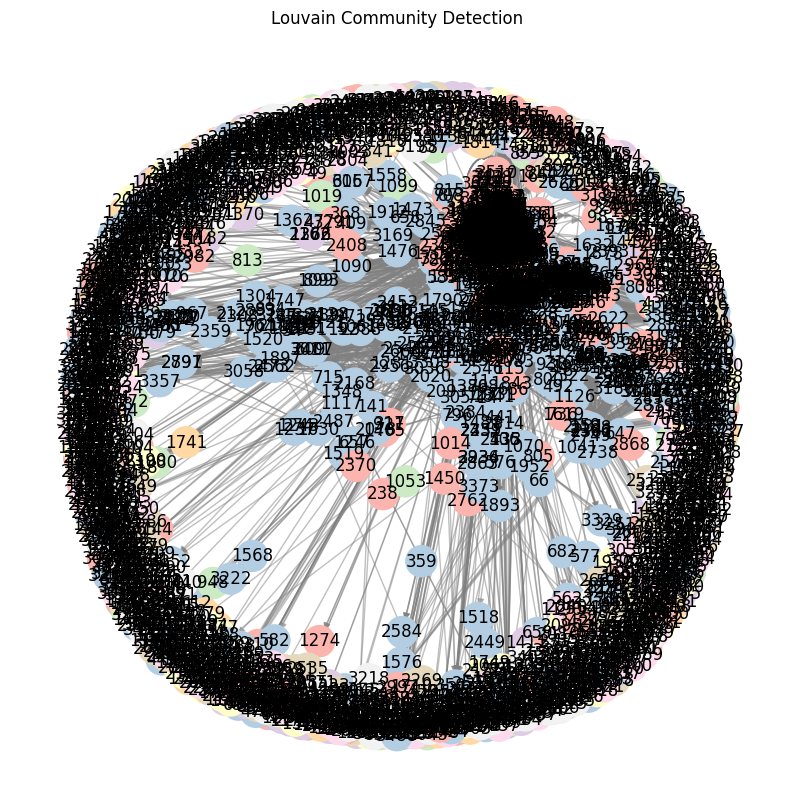

In [7]:
# Louvain Community Visualization
plt.figure(figsize=(10, 10))
cmap = plt.cm.get_cmap('Pastel1', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=500, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.title("Louvain Community Detection")
plt.axis('off')
plt.savefig("Louvain_Community_Detection.png", dpi=200, bbox_inches='tight')
plt.show()

In [8]:
# Step 4: Girvan-Newman Community Detection
comp = nx.community.girvan_newman(G)
best_division = tuple(sorted(c) for c in next(comp))

# Create a dictionary mapping each node to a community
community_dict_gn = {node: i for i, community in enumerate(best_division) for node in community}


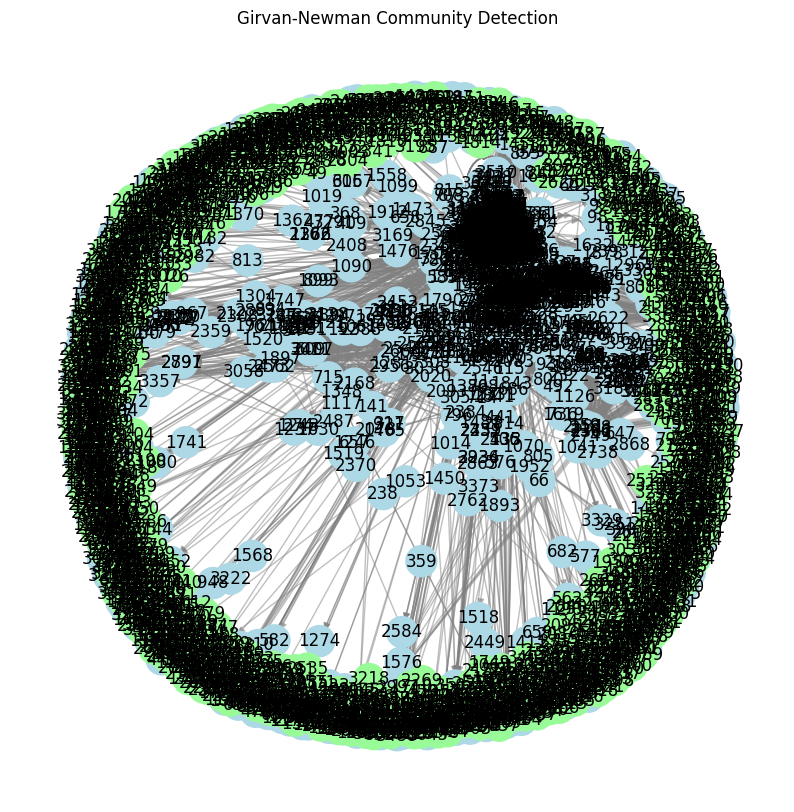

In [9]:
# Girvan-Newman Community Visualization
plt.figure(figsize=(10, 10))
cmap = ListedColormap(['#add8e6', '#98fb98'])
nx.draw_networkx_nodes(G, pos, community_dict_gn.keys(), node_size=500, cmap=cmap, node_color=list(community_dict_gn.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.title("Girvan-Newman Community Detection")
plt.axis('off')
plt.savefig("Girvan_Newman_Community_Detection.png", dpi=200, bbox_inches='tight')
plt.show()

In [10]:
# Step 5: Spectral Clustering
A = nx.adjacency_matrix(G).toarray()
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(A)

C:\Users\penda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\penda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(affinity='precomputed', n_clusters=2, n_init=100)

In [11]:
# Map nodes to communities
labels = sc.labels_
community_dict_sc = {node: labels[i] for i, node in enumerate(G.nodes)}

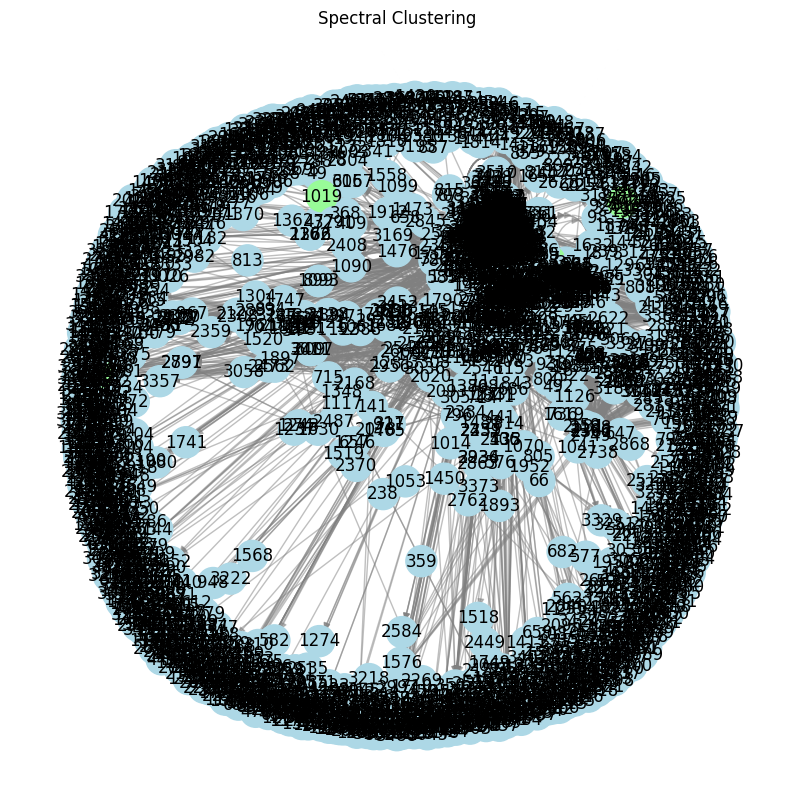

In [12]:
# Spectral Clustering Visualization
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, community_dict_sc.keys(), node_size=500, cmap=cmap, node_color=list(community_dict_sc.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.title("Spectral Clustering")
plt.axis('off')
plt.savefig("Spectral_Clustering_Community_Detection.png", dpi=200, bbox_inches='tight')
plt.show()


In [13]:
# Step 6: Save Communities to File
# Save Louvain Communities
communities = {i: [] for i in set(partition.values())}
for node, comm_id in partition.items():
    communities[comm_id].append(node)

with open("Louvain_Communities.txt", "w") as file:
    for comm_id, nodes in communities.items():
        file.write(f"Community {comm_id}: {nodes}\n")

# Save Girvan-Newman and Spectral Communities if needed similarly